# Investigating Fandango Movie Ratings


In October 2015, a data journalist named Walt Hickey analyzed movie ratings data on the site Fandango and found strong evidence to suggest that Fandango's rating system was biased and dishonest.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star.   For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4     stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to     the nearest whole star. For instance, a 4.5 rating would be rounded off   to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a     rating of 4 in the HTML of the page to a displayed rating of 5 stars.


In this project, we will analyze data of recent movie ratings as well as data from movies prior to Hickey's analysis to determine if there has been a change to Fandango's ratings algorithm since Hickey's analysis.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [13]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [14]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [9]:
cols_before = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                 'Fandango_votes', 'Fandango_Difference']

cols_after = ['movie', 'year', 'fandango']
fandango_before = before[cols_fandango]
fandango_after = after[cols_after]

In [10]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [11]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The population for our analysis is all the movie ratings stored on Fandango's website. The samples we have (`fandango_before`, `fandango_after`) are representative of this population since one is before Hickey's analysis and the other is after.

From Hickey's article and from the README.md of the data set's [repository](https://github.com/fivethirtyeight/data/tree/master/fandango) we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of           sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling conditions for our other sample were:
- The movie must have been released in 2016 or later
- The movie must have had a considerable number of votes and reviews

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.


# Changing our Analysis

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

With this new research goal, we have two populations of interest:

1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016.

We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [15]:
fandango_after.sample(10, random_state=10)

,movie,year,fandango
161,The Autopsy of Jane Doe,2016,4.5
120,Neighbors 2: Sorority Rising,2016,3.5
105,Masterminds,2016,3.5
148,Split,2016,4.0
69,Hidden Figures,2016,5.0
127,Ouija: Origin of Evil,2016,3.5
19,Beauty and the Beast,2017,4.5
175,The Forest,2016,3.0
47,Elvis & Nixon,2016,3.5
149,Star Trek Beyond,2016,4.5


It seems we have a pretty representative sample.

Exploring the two data sets, it is easy to notice that there are movies with a releasing year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.

In [16]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


Creating a function to extract the year values from the 'FILM' column

In [45]:
def get_year(col):
    string_col = col.replace('(', '').replace(')', '')
    string_col = string_col[-4:]
    return string_col

In [46]:
fandango_before['Year'] = fandango_before['FILM'].apply(get_year)

In [47]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [48]:
fandango_2015 = fandango_before[fandango_before['Year'] == '2015'].copy()
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()

In [49]:
fandango_2015.shape

(129, 6)

In [50]:
fandango_2016.shape

(191, 3)

# Comparing Distributions for 2015 and 2016

We'll start with comparing the shape of the two distributions using kernel density plots. We'll use the [FiveThirtyEight](https://www.dataquest.io/blog/making-538-plots/) style for the plots.

In [51]:
from numpy import arange
plt.style.use('fivethirtyeight')

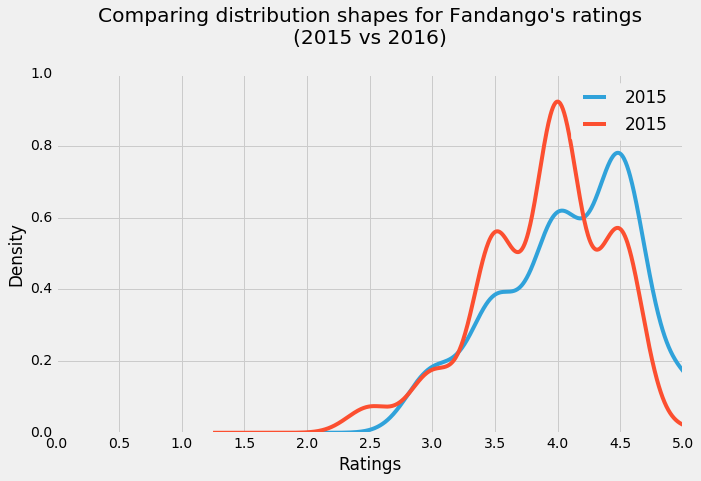

In [52]:
fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(10,6))
fandango_2016['fandango'].plot.kde(label='2015', legend=True, figsize=(10,6))

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", y = 1.07)
plt.xlabel('Ratings')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

Based on the graphs above we can see that both plots show that the distributions are left skewed: meaning that the ratings on Fandango tend to be higher.

However, the 2016 plot is shifted to the right by a little, this means that in general, ratings for movies in 2016 were sligtly lower than for movies in 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

# Relative Frequency of each Data Set

In [53]:
print('2015' + '\n' + '-' * 16) 
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [54]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the frequency tables we see that in 2016, ratings dropped below the 3.0 threshold down to 2.5 and about 3% of movies in 2016 were below the 3.0 rating where as in 2015 there were no movies having a rating below 3.

In 2016, more movies were rated between 3.5 and 4 than they were in 2015. 

# Determining the Direction of Change

In [56]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summ = pd.DataFrame()
summ['2015'] = [mean_2015, median_2015, mode_2015]
summ['2016'] = [mean_2016, median_2016, mode_2016]

summ.index = ['mean', 'median', 'mode']
summ

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


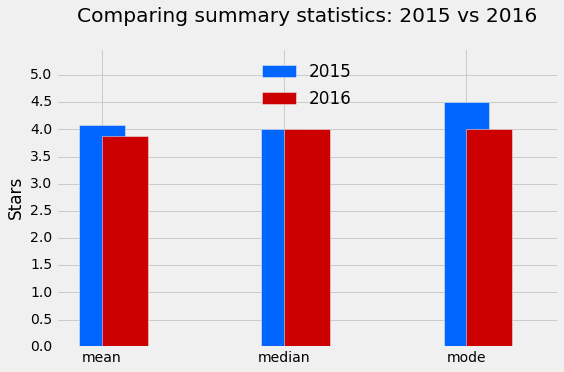

In [57]:
plt.style.use('fivethirtyeight')
summ['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = 0.25)
summ['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = 0.25,
                      rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating was lower in 2016 by approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

# Conclusion

Analysis shows that there indeed is a difference between Fandango's ratings for popular movies in 2015 and ratings for popular movies in 2016. Although there is no conclusive end as to what cause the slight differences, one can assume that Hickey's analysis had a part to play in it.